In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
raw_data = pd.read_csv('mail_data.csv')


In [2]:
print(raw_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
data = raw_data.where((pd.notnull(raw_data)),'')
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


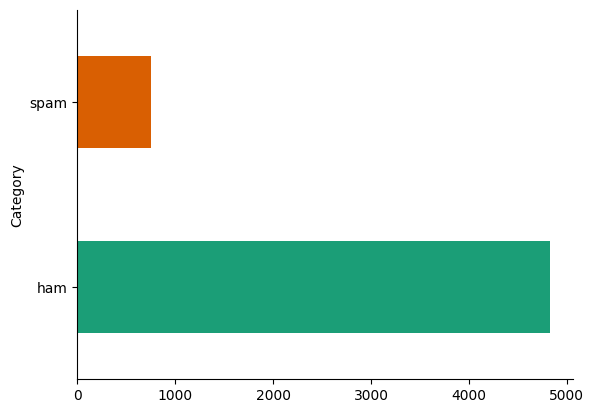

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1
X = data['Message']
Y = data['Category']

Splitting the data into training data & test data

---





In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [8]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)


In [9]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train_features = Y_train.astype('int')
Y_test_features= Y_test.astype('int')
print(X_train_features)

  (0, 13)	0.24071300819920022
  (0, 268)	0.23340310675670678
  (0, 319)	0.19699875090159716
  (0, 2655)	0.23567517221627782
  (0, 483)	0.30660942166399885
  (0, 1838)	0.21769166042882088
  (0, 3498)	0.23810405217043706
  (0, 152)	0.29233510531841544
  (0, 5151)	0.22925657903463742
  (0, 5507)	0.24071300819920022
  (0, 639)	0.22382973582485371
  (0, 5985)	0.2137019472013397
  (0, 37)	0.30660942166399885
  (0, 6293)	0.23340310675670678
  (0, 789)	0.2137019472013397
  (0, 349)	0.23810405217043706
  (0, 5282)	0.22925657903463742
  (1, 868)	0.4257720584818292
  (1, 2771)	0.5008859089706319
  (1, 888)	0.614429498346913
  (1, 7218)	0.4362428818582263
  (2, 2902)	0.23224513360608368
  (2, 7012)	0.21563598941247258
  (2, 7270)	0.35852168992715977
  (2, 1865)	0.23975945144252078
  :	:
  (4454, 3983)	0.1781840767747936
  (4454, 4126)	0.4564544215091293
  (4454, 3860)	0.1389307758575636
  (4454, 3775)	0.12891974099608616
  (4455, 2072)	0.5698001698710339
  (4455, 4450)	0.5432729097680502
  (4455, 

In [10]:
model = LogisticRegression()
#Training the model with train data
model.fit(X_train_features, Y_train_features)


LogisticRegression()

In [11]:
# prediction on training data

prediction_traindata = model.predict(X_train_features)
accuracy_traindata = accuracy_score(Y_train_features, prediction_traindata)
print('Accuracy on training data : ', accuracy_traindata)

Accuracy on training data :  0.9670181736594121


In [12]:
# prediction on test data
prediction_testdata = model.predict(X_test_features)
accuracy_testdata = accuracy_score(Y_test_features, prediction_testdata)
print('Accuracy on training data : ', accuracy_testdata)

Accuracy on training data :  0.968609865470852


Predictive System


In [13]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = feature_extraction.transform(input_mail)

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [14]:
tfidf = TfidfVectorizer(max_features=3000,min_df = 1, stop_words='english', lowercase=True)
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [15]:
print(data['Category'].value_counts())
label_encoder=LabelEncoder()
labels=label_encoder.fit_transform(data.Category)
data['Target']=labels


Category
1    4825
0     747
Name: count, dtype: int64
